# Notebook for preparing and saving MOLECULAR (ZINC full) graphs

In [1]:
import numpy as np
import torch
import pickle
import time
import os
%matplotlib inline
import matplotlib.pyplot as plt


# Download ZINC full dataset

In [2]:
if not os.path.isfile('molecules_zinc_full.zip'):
    print('downloading..')
    !curl https://www.dropbox.com/s/grhitgnuuixoxwl/molecules_zinc_full.zip?dl=1 -o molecules_zinc_full.zip -J -L -k
    !unzip molecules_zinc_full.zip -d ../
    !rm -r ../__MACOSX/
    # !tar -xvf molecules_zinc_full.zip -C ../
else:
    print('File already downloaded')

downloading..
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 43.6M  100 43.6M    0     0  7898k      0  0:00:05  0:00:05 --:--:-- 10.3M
Archive:  molecules_zinc_full.zip
   creating: ../molecules/zinc_full/
  inflating: ../__MACOSX/molecules/._zinc_full  
  inflating: ../molecules/zinc_full/test.pickle  
  inflating: ../__MACOSX/molecules/zinc_full/._test.pickle  
  inflating: ../molecules/zinc_full/.DS_Store  
  inflating: ../__MACOSX/molecules/zinc_full/._.DS_Store  
  inflating: ../molecules/zinc_full/val.pickle  
  inflating: ../__MACOSX/molecules/zinc_full/._val.pickle  
  inflating: ../molecules/zinc_full/atom_dict.pickle  
  inflating: ../__MACOSX/molecules/zinc_full/._atom_dict.pickle  
  inflating: ../molecul

# Convert to DGL format and save with pickle

In [3]:
import os
os.chdir('../../') # go to root folder of the project
print(os.getcwd())


/home/vijay/graphdeeplearning/benchmarking-gnns


In [4]:
import pickle

%load_ext autoreload
%autoreload 2

from data.molecules import MoleculeDatasetDGL 

from data.data import LoadData
from torch.utils.data import DataLoader
from data.molecules import MoleculeDataset


In [5]:
DATASET_NAME = 'ZINC-full'
dataset = MoleculeDatasetDGL(DATASET_NAME)

preparing 220011 graphs for the TRAIN set...
preparing 24445 graphs for the VAL set...
preparing 5000 graphs for the TEST set...
Time taken: 1075.5591s


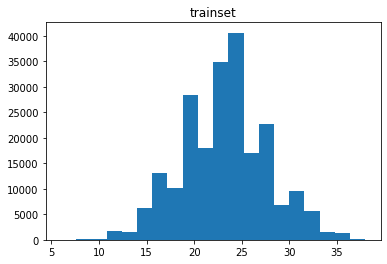

min/max : 6 38


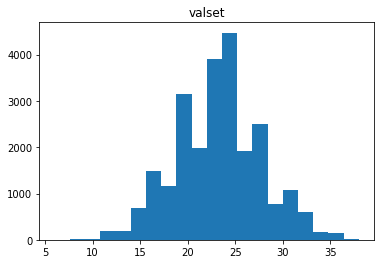

min/max : 6 38


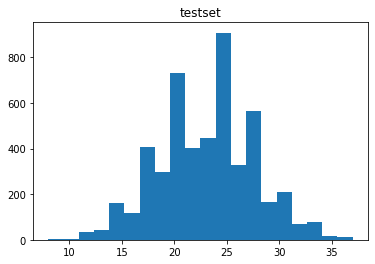

min/max : 8 37


In [6]:
def plot_histo_graphs(dataset, title):
    # histogram of graph sizes
    graph_sizes = []
    for graph in dataset:
        graph_sizes.append(graph[0].number_of_nodes())
    plt.figure(1)
    plt.hist(graph_sizes, bins=20)
    plt.title(title)
    plt.show()
    graph_sizes = torch.Tensor(graph_sizes)
    print('min/max :',graph_sizes.min().long().item(),graph_sizes.max().long().item())
    
plot_histo_graphs(dataset.train,'trainset')
plot_histo_graphs(dataset.val,'valset')
plot_histo_graphs(dataset.test,'testset')


In [7]:
print(len(dataset.train))
print(len(dataset.val))
print(len(dataset.test))

print(dataset.train[0])
print(dataset.val[0])
print(dataset.test[0])


220011
24445
5000
(DGLGraph(num_nodes=33, num_edges=72,
         ndata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}
         edata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}), tensor([3.0464]))
(DGLGraph(num_nodes=21, num_edges=44,
         ndata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}
         edata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}), tensor([2.0992]))
(DGLGraph(num_nodes=24, num_edges=52,
         ndata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}
         edata_schemes={'feat': Scheme(shape=(), dtype=torch.int64)}), tensor([3.1382]))


In [8]:
num_atom_type = 28
num_bond_type = 4


In [9]:
start = time.time()
with open('data/molecules/ZINC-full.pkl','wb') as f:
        pickle.dump([dataset.train,dataset.val,dataset.test,num_atom_type,num_bond_type],f)
print('Time (sec):',time.time() - start) #131s

/home/vijay/miniconda3/envs/benchmark_gnn/lib/python3.7/site-packages/torch/storage.py:34: FutureWarning: pickle support for Storage will be removed in 1.5. Use `torch.save` instead
  warnings.warn("pickle support for Storage will be removed in 1.5. Use `torch.save` instead", FutureWarning)


Time (sec): 131.04525065422058


# Test load function

In [10]:
DATASET_NAME = 'ZINC-full'
dataset = LoadData(DATASET_NAME)
trainset, valset, testset = dataset.train, dataset.val, dataset.test #154s

[I] Loading dataset ZINC-full...
train, test, val sizes : 220011 5000 24445
[I] Finished loading.
[I] Data load time: 154.6146s


In [11]:
batch_size = 10
collate = MoleculeDataset.collate
print(MoleculeDataset)
train_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True, collate_fn=collate)


<class 'data.molecules.MoleculeDataset'>
